# Task 3 - To Explore Unsupervised Machine Learning



To Predict the optimal number of clusters, we use K-Means Clustering Algorithm in our dataset 'Iris' and visualise the clusters on a graph.

#### Importing all the libraries required.

In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import datasets

#### Load the iris dataset

In [7]:
iris = datasets.load_iris()
iris_data = pd.DataFrame(iris.data, columns = iris.feature_names)

#### Exploring The Dataset

In [8]:
iris_data.shape

(150, 4)

In [9]:
iris_data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [10]:
iris_data.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [11]:
#correlation data
corr_data = iris_data.corr()
corr_data
#to see how the feature values are correlated to one other.

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.117570,0.871754,0.817941
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126
petal length (cm),0.871754,-0.428440,1.000000,0.962865
petal width (cm),0.817941,-0.366126,0.962865,1.000000


#### Ploting our data

<Figure size 1440x720 with 0 Axes>

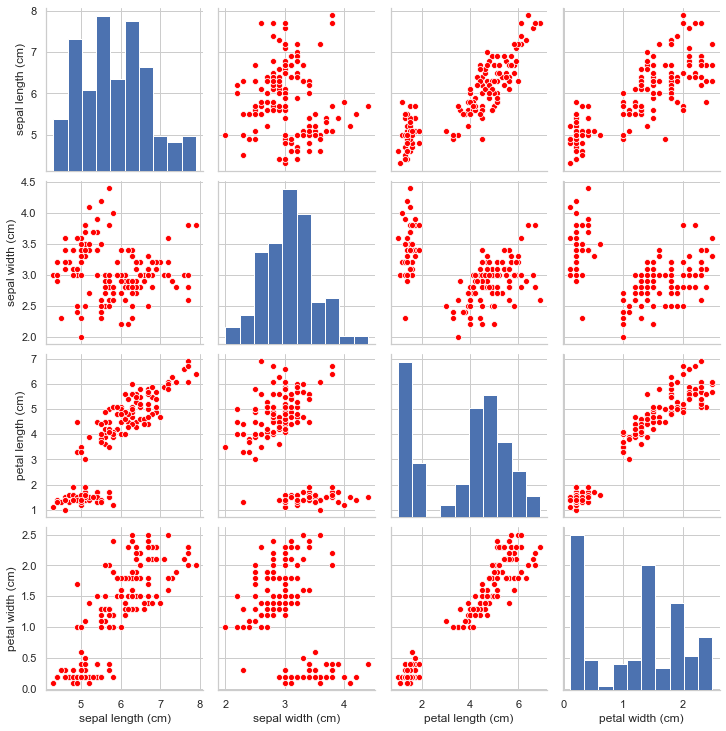

In [12]:
#ploting the data as pair plots.
sns.set(style = 'whitegrid')
plt.figure(figsize = (20, 10))
sns.pairplot(iris_data, plot_kws = {'color' : 'red'});

##### plotiing a heat map for our correlation plot

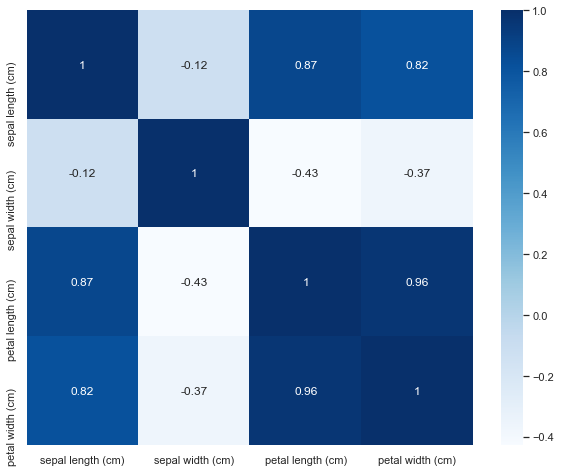

In [13]:
# Heat Map
sns.set()
plt.figure(figsize = (10, 8))
sns.heatmap(iris_data.corr(),annot= True, cmap="Blues")

**Now lets create an array containing our dependent variables**

In [14]:
X = iris_data.iloc[:, 0:4].values
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

####  To Find the optimal number of clusters by using K-Means Clustering algorithm

We are using The ELbow Method to find the number of optimal number of clusters

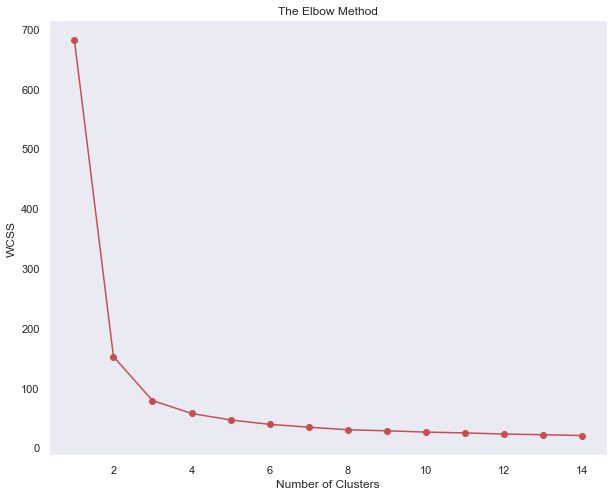

In [15]:

from sklearn.cluster import KMeans
wcss = []

for i in range(1, 15):
    
    # We will use "k-means++" initialization method to avoid falling into the random initialization trap.
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)    
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    
# Plotting the the elbow method graph
plt.figure(figsize=(10, 8))
plt.plot(range(1, 15), wcss, 'r-o')
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')  # Within cluster sum of squares
plt.grid()
plt.show()

We determine the optimum clusters when an elbow occurs in the graph. And After every iteration the list  WCSS dosent decrease with every iteration

In the following graph,  after 3 the graph becomes linear. Hence , the optimal number of clusters will be 3.

#### Training the K-Means model and creating a classifier of predicted dataset

In [16]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_predictions = kmeans.fit_predict(X)

#### Visualising our clusters

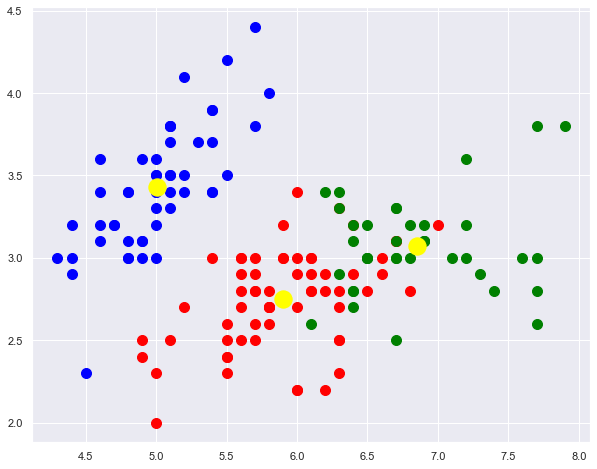

In [17]:
plt.figure(figsize=(10, 8))
plt.scatter(X[y_predictions == 0, 0], X[y_predictions == 0, 1], s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(X[y_predictions == 1, 0], X[y_predictions == 1, 1], s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(X[y_predictions == 2, 0], X[y_predictions == 2, 1] , s = 100, c = 'green', label = 'Iris-virginica')


plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 300, c = 'yellow', label = 'Centroids')

## THANK YOU!!

###   - BY SIMRAN AGRAWAL